# Genotype Concordance

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import OrderedDict

In [183]:
def add_summary(data, with_as=False):
    """
    Add summary stats to a dataframe
    """
    e = "as_" if with_as else ""
    data['Total Calls'] = data[['Concordant', 'Discordant', 'Missing', 'Filtered']].sum(axis=1)
    data['Total Genotyped'] = data['Total Calls'] - data['Missing']
    data['Missing Rate'] = data['Missing'] / data['Total Genotyped']
    data['GT Concordance'] = data['Concordant'] / data['Total Genotyped']
    data[f'{e}compP'] = data[f'{e}TP'] + data[f'{e}FP']
    data[f'{e}baseP'] = data[f'{e}TP'] + data[f'{e}FN']
    data[f'{e}compN'] = data[f'{e}TN'] + data[f'{e}FN']
    data[f'{e}baseN'] = data[f'{e}TN'] + data[f'{e}FP']
    data[f'{e}ppv'] = data[f'{e}TP'] / data[f'{e}compP']
    data[f'{e}tpr'] = data[f'{e}TP'] / data[f'{e}baseP']
    data[f'{e}tnr'] = data[f'{e}TN'] / data[f'{e}baseN']
    data[f'{e}npv'] = data[f'{e}TN'] / data[f'{e}compN']
    data[f'{e}acc'] = (data[f'{e}TP'] + data[f'{e}TN']) / (data[f'{e}baseP'] + data[f'{e}baseN'])
    data[f'{e}ba'] = (data[f'{e}tpr'] + data[f'{e}tnr']) / 2
    data[f'{e}f1'] = 2 * ((data[f'{e}ppv'] * data[f'{e}tpr']) / (data[f'{e}ppv'] + data[f'{e}tpr']))
    
def plot_gtconcordance_barplot(subset, title="Genotype Concordance"):
    subset = svtype_data[(svtype_data['svtype'] == 'TOT')
                    & (svtype_data['experiment'] == 'ts')
                    & (svtype_data['technology'] == 'pac')]
    p = sb.barplot(data=subset, x="program", y="GT Concordance", hue="coverage", 
                   hue_order=['32x', '16x', '8x'], zorder=2)
    p.set(title=title, xlabel="Program", ylabel="GT Concordance")

    categories = subset['program'].unique()
    num_categories = len(categories)

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(0.5, 0.80)
    plt.grid(axis='y', zorder=1)
    legend = p.legend(frameon=True, title='Coverage', loc='upper right')
    legend.get_frame().set_edgecolor('white')
    
def plot_typestrat(subset_a, subset_b):
    """
    A is TRs, B is Non-TRs
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

    p = sb.barplot(data=subset_a, x="program", y="GT Concordance", hue="svtype", 
                   hue_order=['DEL', 'INS'], order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                   zorder=2, ax=ax1)


    categories = subset['program'].unique()
    num_categories = len(categories) - 1

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(0.5, 1)
    ax1.grid(axis='y', zorder=1)
    legend = p.legend(frameon=True, title='SV Type', ncol=2, loc='upper right')
    legend.get_frame().set_edgecolor('white')
    ax1.set(title="Tandem Repeats")

    ## Secont half
    p = sb.barplot(data=subset_b, x="program", y="GT Concordance", hue="svtype", 
                   hue_order=['DEL', 'INS'], order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                   zorder=2, ax=ax2)


    p.set(title="Non-Tandem Repeats", xlabel="Program", ylabel="GT Concordance")

    categories = subset['program'].unique()
    num_categories = len(categories) - 1

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(0.5, 1)
    ax2.grid(axis='y', zorder=1)
    ax2.legend().remove()
    #legend = p.legend(frameon=True, title='SV Type', loc='upper right')
    #legend.get_frame().set_edgecolor('white')

In [9]:
gt_data = pd.read_csv("../results/tables/all.gt_dist.table.txt", sep='\t')
inter_data = pd.read_csv("../results/tables/all.intersect.table.txt", sep='\t')
neigh_data = pd.read_csv("../results/tables/all.neighbor.table.txt", sep='\t')
svtype_data = pd.read_csv("../results/tables/all.svtype.table.txt", sep='\t')

tr_gt_data = pd.read_csv("../results/tables/tr.gt_dist.table.txt", sep='\t')
tr_inter_data = pd.read_csv("../results/tables/tr.intersect.table.txt", sep='\t')
tr_neigh_data = pd.read_csv("../results/tables/tr.neighbor.table.txt", sep='\t')
tr_svtype_data = pd.read_csv("../results/tables/tr.svtype.table.txt", sep='\t')

ntr_gt_data = pd.read_csv("../results/tables/non_tr.gt_dist.table.txt", sep='\t')
ntr_inter_data = pd.read_csv("../results/tables/non_tr.intersect.table.txt", sep='\t')
ntr_neigh_data = pd.read_csv("../results/tables/non_tr.neighbor.table.txt", sep='\t')
ntr_svtype_data = pd.read_csv("../results/tables/non_tr.svtype.table.txt", sep='\t')


In [124]:
add_summary(svtype_data)
add_summary(tr_svtype_data)
add_summary(ntr_svtype_data)

The average genotyping concordance of a single-sample’s predicted SV genotypes to the truth SV genotypes for kanpig was 0.795 compared to 0.720 for svjedi, 0.650 for sniffles, and 0.616 for cuteSV.

In [64]:
view = svtype_data[(svtype_data['svtype'] == 'TOT')
                   & (svtype_data['experiment'] == 'ts')
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '32x')]
view.groupby('program')['GT Concordance'].describe()['mean'].round(3)

program
cutesv      0.616
kanpig      0.795
sniffles    0.650
svjedi      0.720
Name: mean, dtype: float64

However, kanpig’s performance at 8x (N) was higher than other tools’ performance at 32x..


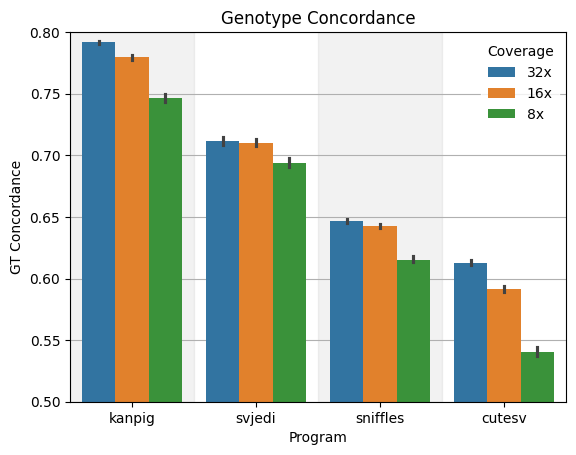

In [180]:
view = svtype_data[(svtype_data['svtype'] == 'TOT')
                    & (svtype_data['experiment'] == 'ts')
                    & (svtype_data['technology'] == 'pac')]
plot_gtconcordance_barplot(view, "Genotype Concordance")

In [65]:
view = svtype_data[(svtype_data['svtype'] == 'TOT')
                   & (svtype_data['experiment'] == 'ts')
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '8x')]
view.groupby('program')['GT Concordance'].describe()['mean'].round(3)

program
cutesv      0.543
kanpig      0.754
sniffles    0.621
svjedi      0.708
Name: mean, dtype: float64

On GRCh38, the samples’ assemblies called an average of 10,553 deletions compared to 16,912 insertions.

In [77]:
view = svtype_data[(svtype_data['svtype'] != 'TOT')
                   & (svtype_data['experiment'] == 'ts')
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '32x')]
view.groupby(['sample', 'svtype'])['Total Calls'].describe().reset_index().groupby(['svtype'])['mean'].mean()


svtype
DEL    10553.515957
INS    16912.503546
Name: mean, dtype: float64

Stratifying the performance of genotypers by SV type (deletions and insertions) revealed that all tools’ performance on deletions is higher than their performance on insertions (Figure2B). The best performing stratification was SVJedi on deletions at 0.816 followed by kanpig’s deletions and insertions at 0.796 and 0.795 respectively.


Overall, kanpig's performance with respect to SV type had the lowest imbalance (deletion concordance minus insertion concordnace) at 0.001 percentage points (p.p) compared to 0.155 p.p. for svjedi, 0.166 p.p. for sniffles, and 0.148 p.p. for cutesv.

In [70]:
view = svtype_data[(svtype_data['svtype'] != 'TOT')
                   & (svtype_data['experiment'] == 'ts')
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '32x')]
view2 = view.groupby(['program', 'svtype'])['GT Concordance'].describe()['mean'].round(3).unstack()
view2['diff'] = view2['DEL'] - view2['INS'] 
view2

svtype,DEL,INS,diff
program,,,
cutesv,0.707,0.559,0.148
kanpig,0.796,0.795,0.001
sniffles,0.752,0.586,0.166
svjedi,0.816,0.661,0.155


Another important stratification for SVs is their overlap with tandem repeats as ~70% of SVs are expected to occur within tandem repeats (cite giabtr). We found that kanpig’s performance on SVs within TRs was 0.784 and its performance outside of TRs was 0.888. Other tools showed a bias towards higher accuracy by 13.5 p.p. in SVs outside of TRs (Figure 2b) The full table of genotypers' performance by coverage, svtype, and tr-status is available in supplementary table X).

In [95]:
a = tr_svtype_data[(tr_svtype_data['svtype'] == 'TOT')
                   & (tr_svtype_data['experiment'] == 'ts')
                   & (tr_svtype_data['technology'] == 'pac')
                   & (tr_svtype_data['coverage'] == '32x')]
a = a.groupby(['program'])['GT Concordance'].mean()

b = ntr_svtype_data[(ntr_svtype_data['svtype'] == 'TOT')
                   & (ntr_svtype_data['experiment'] == 'ts')
                   & (ntr_svtype_data['technology'] == 'pac')
                   & (ntr_svtype_data['coverage'] == '32x')]
b = b.groupby(['program'])['GT Concordance'].mean()

view = pd.concat([a, b], axis=1)
view.columns = ['TR', 'nonTR']
view['diff'] = view['nonTR'] - view['TR']
print('mean nonk diff', view.loc[['cutesv', 'sniffles', 'svjedi']]['diff'].mean())
view.round(3)

mean nonk diff 0.13585812724928492


,TR,nonTR,diff
program,,,
cutesv,0.573,0.767,0.194
kanpig,0.785,0.888,0.103
sniffles,0.617,0.742,0.125
svjedi,0.697,0.785,0.089


In [100]:
# Full table
a = svtype_data[(svtype_data['experiment'] == 'ts')].copy()
a['TR'] = 'all'

b = tr_svtype_data[(tr_svtype_data['experiment'] == 'ts')].copy()
b['TR'] = 'within'

c = ntr_svtype_data[(ntr_svtype_data['experiment'] == 'ts')].copy()
c['TR'] = 'outside'

view = pd.concat([a, b, c])
sup_table = (view.groupby(['program', 'coverage', 'svtype', 'TR'])['GT Concordance'].describe()[['mean', 'std']].reset_index())
sup_table.to_csv("SupTable_TS_GTconcordance.txt", sep='\t', index=False)

There are approximately four times as many heterozygous as homozygous variants expected per-sample; we explored the distributions of genotypes across all samples in the baseline and from each genotyper’s results (Figure2C). Kanpig’s het/hom ratio is closest to the baseline’s 4.58 at 3.00 compared to 1.28 for svjedi, 1.20 for sniffles, and 1.38 for cutesv. When considering the proportion of genotypes from these single-sample analysis incorrectly reported as reference homozygous (i.e. failure to support the alternate allele) Kanpig exhibits the second highest proportion at 11.4% while the highest is from cutesv at 16.5%. Furthermore, the highest missing rate (i.e. insufficient coverage to assign any genotype, Kanpig is the highest at 3.5% while svjedi is second at 1.2%. Despite kanpig's lower performance on these two measurements of genotyping error, our previous measurements of genotype concordance already account for these errors and, as described above, did not prevent kanpig from producing the highest genotyping concordance.

In [228]:
baseline = gt_data[(gt_data['program'] == 'baseline')
                   & (gt_data['coverage'] == '32x')
                   & (gt_data['experiment'] == 'truth')
                  ].copy()
baseline['ratio'] = baseline['HET']/ baseline['HOM']
baseline['ratio'].mean()

4.583221945686985

In [118]:
comp = gt_data[(gt_data['program'] != 'baseline')
                   & (gt_data['coverage'] == '32x')
                  & (gt_data['experiment'] == 'ts')].copy()
comp['ratio'] = comp['HET']/ comp['HOM']
comp['tot'] = comp[['REF', 'HET', 'HOM', 'NON', 'UNK']].sum(axis=1)
comp['missing_rate'] = comp['NON'] / comp['tot']
comp['ref_rate'] = comp['REF'] / comp['tot']
comp.groupby(['program'])[['ratio', 'missing_rate', 'ref_rate']].mean()

,ratio,missing_rate,ref_rate
program,,,
cutesv,1.383981,0.004728,0.165358
kanpig,3.002252,0.035287,0.114388
sniffles,1.207406,0.005258,0.073808
svjedi,1.286313,0.012209,0.025650


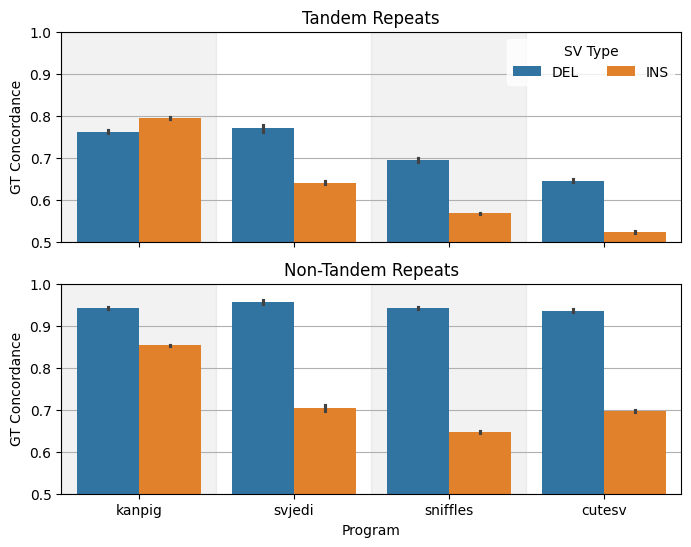

In [184]:
for exp in ['ts']:
    subset_a = tr_svtype_data[(tr_svtype_data['svtype'] != 'TOT')
                & (tr_svtype_data['coverage'] == '32x')
                & (tr_svtype_data['experiment'] == exp)
                & (tr_svtype_data['technology'] == 'pac')]
    subset_b = ntr_svtype_data[(ntr_svtype_data['svtype'] != 'TOT')
                    & (ntr_svtype_data['coverage'] == '32x')
                    & (ntr_svtype_data['experiment'] == exp)
                    & (ntr_svtype_data['technology'] == 'pac')]

    plot_typestrat(subset_a, subset_b)
    plt.show()

Genotypers are dependent on the completeness of the SVs being genotyped. 

SVJedi's higher performance on R9 compared to R10 ONT is counter to other genotypers which all perform better on the higher accuracy R10 reads.

# Genotype Distribution

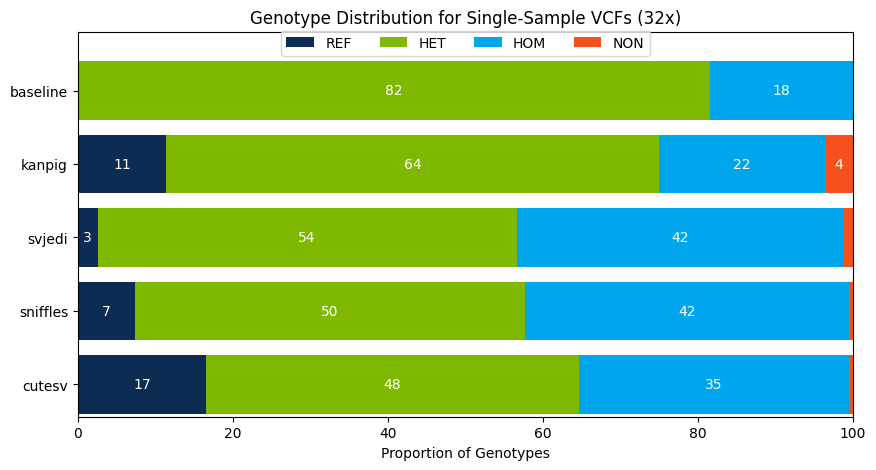

In [13]:
tests = ['cutesv', 'sniffles', 'svjedi', 'kanpig', 'baseline']

m_data = OrderedDict()

# Bottom up order
view = gt_data[(gt_data['coverage'] == '32x') 
               & (gt_data['technology'] == 'pac')
              & (gt_data['experiment'].isin(['ts', 'truth']))]
for i in tests:
    m_data[(i, 'pac')] = view[view['program'] == i][['REF', 'HET', 'HOM', 'NON']].sum()

#data[('exbaseline', '')] = [17937331 , 1079127, 233567, 0]

# Normalize the data by percentages for each test and observation
normalized_data = OrderedDict()
y_labels = []
y_super = []
for key, counts in m_data.items():
    total = np.sum(counts)
    normalized_data[key] = (counts / total) * 100

    y_labels.append(key[0])
    if key[1] not in y_super:
        y_super.append(key[1])

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = .6
y_positions = []

# Define colors for each category
colors = ['#0D2C54', '#7FB800', '#00A6ED', '#F6511D']
categories = ['REF', 'HET', 'HOM', 'NON']

# Plot each test and observation
y_pos = -.75
for i, ((test, observation), counts) in enumerate(normalized_data.items()):
    y_pos += .75
    y_positions.append(y_pos)
    left = 0
    for j, (count, color, category) in enumerate(zip(counts, colors, categories)):
        ax.barh(y_pos, count, left=left, color=color, height=bar_width, label=category if y_pos == 0 else "")
        if count > 1.5:  # Only add text if the percentage is greater than 5
            ax.text(left + count / 2, y_pos, f'{count:.0f}', va='center', ha='center', color='white')
        left += count

# Adding labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_ylim((-.33, max(y_positions) + .6))
ax.set_xlabel('Proportion of Genotypes')
ax.set_title('Genotype Distribution for Single-Sample VCFs (32x)')

# Adjusting the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(categories)], labels[:len(categories)], 
          loc="upper center", bbox_to_anchor=(0.5, 1.021), ncol=len(categories))
#sb.despine(fig)
plt.show()


# Number of Neighbors

In [127]:
add_summary(neigh_data)

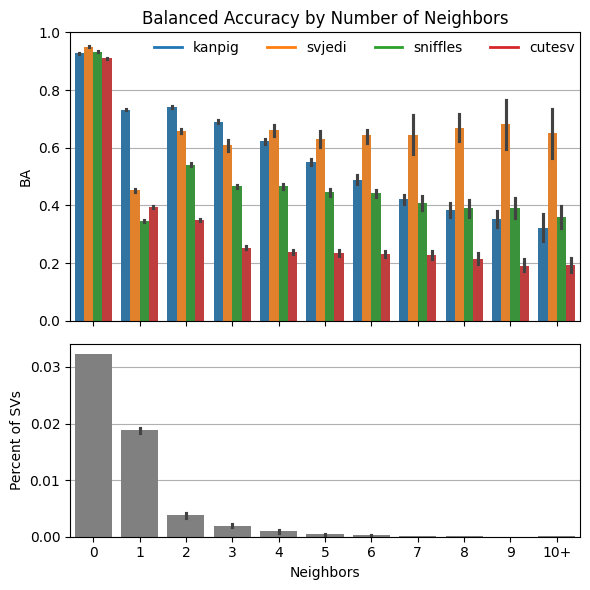

In [132]:
yvar = "GT Concordance"
experiment = "ts"
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6),
                              gridspec_kw={'height_ratios': [3, 2]})  # figsize is (width, height)

view = neigh_data[(neigh_data['experiment'] == experiment) 
                  & (neigh_data['technology'] == 'pac')
                 & (neigh_data['coverage'] == '32x')]
lineplot = sb.barplot(data=view, ax=ax1,
                       x="num_neigh", y=yvar, 
                       hue="program",
                      hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                     zorder=2)

hue_labels = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
#styles = ['solid', 'dashed']
#style_labels = neigh_data['Technology'].unique()

# Get handles and labels for both hue and style
handles, _ = lineplot.get_legend_handles_labels()

# Create legend elements
hue_elements = [plt.Line2D([0], [0], color=sb.color_palette()[i], lw=2) for i in range(len(hue_labels))]
#style_elements = [plt.Line2D([0], [0], color='black', linestyle=styles[i], lw=2) for i in range(len(style_labels))]

# Combine elements
legend_elements = hue_elements #+ style_elements
legend_labels = list(hue_labels) #+ list(style_labels)

lineplot.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
lineplot.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"])
lineplot.set(title="Balanced Accuracy by Number of Neighbors", 
             xlabel="", 
             ylabel="BA")
# Create custom legend
ax1.legend(legend_elements, legend_labels, title='', ncol=4, loc='upper right', 
           bbox_to_anchor=(1.015, 1.015), frameon=False)
ax1.grid(axis='y', zorder=1)

# This is redundantly added...
baseline = neigh_data[(neigh_data['technology'] == 'pac')
                      & (neigh_data['coverage'] == '32x')
                      & (neigh_data['sample'] == 'HG002')]
pct = baseline[['num_neigh', 'Total Calls']].copy()
pct['percent of calls'] = pct['Total Calls'] / pct['Total Calls'].sum()
hist = sb.barplot(data=pct, x="num_neigh", y="percent of calls", zorder=2, color='#808080')
hist.set(ylabel="Percent of SVs", xlabel="Neighbors")
ax2.grid(axis='y', zorder=1)
fig.tight_layout()

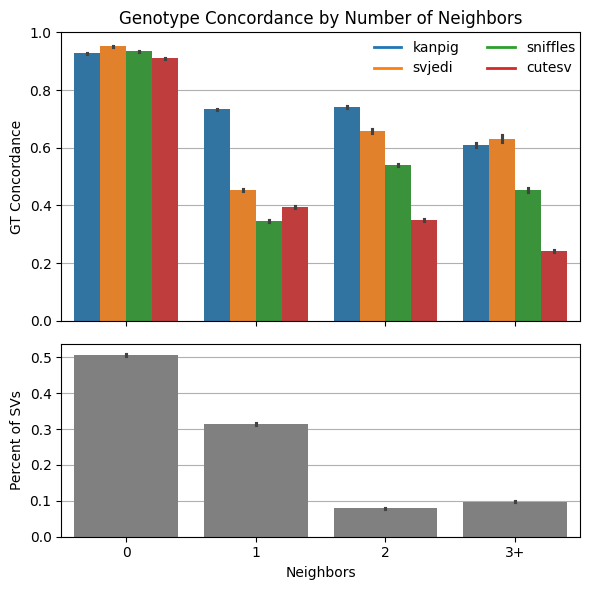

In [229]:

view = neigh_data[(neigh_data['experiment'] == 'ts') 
                  & (neigh_data['technology'] == 'pac')
                 & (neigh_data['coverage'] == '32x')]

new_parts = []
for _, i in view.groupby(['sample', 'program']):
    rest = i[i['num_neigh'] >= 3]
    rest_sum = rest[['Concordant', 'Discordant', 'Missing', 'Filtered', "TP", "FP", "TN", "FN"]].sum()

    half = i[i['num_neigh'] < 3][list(rest_sum.index) + ['num_neigh']].copy()

    rest_sum['num_neigh'] = 3
    rest_sum['sample'] = _[0]
    rest_sum['program'] = _[1]

    
    half['sample'] = _[0]
    half['program'] = _[1]
    
    new_row = pd.concat([half, rest_sum.to_frame().T])
    
    new_parts.append(new_row)

view2 = pd.concat(new_parts)
add_summary(view2)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6),
                              gridspec_kw={'height_ratios': [3, 2]})  # figsize is (width, height)

lineplot = sb.barplot(data=view2, ax=ax1,
                       x="num_neigh", y=yvar, 
                       hue="program",
                      hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                     zorder=2)

hue_labels = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
#styles = ['solid', 'dashed']
#style_labels = neigh_data['Technology'].unique()

# Get handles and labels for both hue and style
handles, _ = lineplot.get_legend_handles_labels()

# Create legend elements
hue_elements = [plt.Line2D([0], [0], color=sb.color_palette()[i], lw=2) for i in range(len(hue_labels))]
#style_elements = [plt.Line2D([0], [0], color='black', linestyle=styles[i], lw=2) for i in range(len(style_labels))]

# Combine elements
legend_elements = hue_elements #+ style_elements
legend_labels = list(hue_labels) #+ list(style_labels)

lineplot.set_xticks([0, 1, 2, 3])
lineplot.set_xticklabels(["0", "1", "2", "3+"])
lineplot.set(title="Genotype Concordance by Number of Neighbors", 
             xlabel="", 
             ylabel="GT Concordance",
            ylim=(0, 1))
# Create custom legend
ax1.legend(legend_elements, legend_labels, title='', ncol=2, loc='upper right', 
           bbox_to_anchor=(1.015, 1.015), frameon=False)
ax1.grid(axis='y', zorder=1)

# This is redundantly added...
baseline = neigh_data[(neigh_data['technology'] == 'pac')
                      & (neigh_data['coverage'] == '32x')
                      & (neigh_data['experiment'] == 'ts')
                     & (neigh_data['program'] == 'kanpig')]

rest = baseline[baseline['num_neigh'] >= 3]
rest_sum = rest.groupby(['sample'])[['Total Calls']].sum().reset_index()

rest_sum['num_neigh'] = 3
half = baseline[baseline['num_neigh'] < 3][['sample', 'num_neigh', 'Total Calls']]

baseline = pd.concat([half, rest_sum])
tot_calls = baseline.groupby(['sample'])[['Total Calls']].sum()
baseline.set_index('sample', inplace=True)
baseline['Abs num calls'] = tot_calls['Total Calls']
baseline['Percent of calls'] = baseline['Total Calls'] / baseline['Abs num calls']

hist = sb.barplot(data=baseline, x="num_neigh", y="Percent of calls", zorder=2, color='#808080')
hist.set(ylabel="Percent of SVs", xlabel="Neighbors")
ax2.grid(axis='y', zorder=1)
fig.tight_layout()

In [172]:
view = neigh_data[(neigh_data['experiment'] == 'ts') 
                  & (neigh_data['technology'] == 'pac')
                 & (neigh_data['coverage'] == '32x')]
new_parts = []
for _, i in view.groupby(['sample', 'program']):
    rest = i[i['num_neigh'] >= 1]
    rest_sum = rest[['Concordant', 'Discordant', 'Missing', 'Filtered', "TP", "FP", "TN", "FN"]].sum()

    half = i[i['num_neigh'] < 1][list(rest_sum.index) + ['num_neigh']].copy()

    rest_sum['num_neigh'] = 1
    rest_sum['sample'] = _[0]
    rest_sum['program'] = _[1]

    
    half['sample'] = _[0]
    half['program'] = _[1]
    
    new_row = pd.concat([half, rest_sum.to_frame().T])
    
    new_parts.append(new_row)

view2 = pd.concat(new_parts)
add_summary(view2)
view2.groupby(['program', 'num_neigh'])['GT Concordance'].mean().unstack()

num_neigh,0,1
program,,
cutesv,0.910873,0.357259
kanpig,0.927895,0.709688
sniffles,0.933817,0.399251
svjedi,0.951072,0.521416


In [ ]:
view2

,Concordant,Discordant,Missing,Filtered,TP,FP,TN,FN,num_neigh,sample,...,baseP,compN,baseN,ppv,tpr,tnr,npv,acc,ba,f1
220,11210,1412,0,0,15987,1057,7708,492,0,HG002,...,16479,8200,8765,0.937984,0.970144,0.879407,0.94,0.938639,0.924775,0.953793
0,4020,8025,0,0,8730,4078,6895,4387,1,HG002,...,13117,11282,10973,0.681605,0.665549,0.628361,0.611151,0.648609,0.646955,0.673481
187,11524,1102,0,0,16111,914,7940,287,0,HG002,...,16398,8227,8854,0.946314,0.982498,0.89677,0.965115,0.952439,0.939634,0.964067
0,8334,3657,0,0,10208,2539,10013,1222,1,HG002,...,11430,11235,12552,0.800816,0.893088,0.797721,0.891233,0.843174,0.845405,0.844439
209,11602,1012,0,0,16298,710,7865,355,0,HG002,...,16653,8220,8575,0.958255,0.978683,0.917201,0.956813,0.957785,0.947942,0.968361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5029,8481,0,0,10168,3955,8035,4862,1,NA21309,...,15030,12897,11990,0.71996,0.676514,0.670142,0.623013,0.673686,0.673328,0.697561
21065,13025,944,0,0,16908,856,10009,165,0,NA21309,...,17073,10174,10865,0.951813,0.990336,0.921215,0.983782,0.963455,0.955775,0.970692
0,9734,3766,0,0,11525,2585,11637,1253,1,NA21309,...,12778,12890,14222,0.816797,0.901941,0.818239,0.902793,0.857852,0.86009,0.85726
21076,13078,872,0,0,17143,594,9833,330,0,NA21309,...,17473,10163,10427,0.966511,0.981114,0.943033,0.967529,0.966882,0.962073,0.973757


In [175]:
baseline = neigh_data[(neigh_data['program'] == 'kanpig')
                      & (neigh_data['coverage'] == '32x')
                     & (neigh_data['experiment'] == 'ts')]
#Total Calls
query = baseline[baseline['num_neigh'] == 0].set_index('sample')['Total Calls'].to_frame()
query['y'] = baseline[baseline['num_neigh'] != 0].groupby(['sample'])['Total Calls'].sum()

query.columns = ['no_neigh', 'has_neigh']

query['pct'] = query['has_neigh'] / (query['has_neigh'] + query['no_neigh'])
query['pct'].describe()

count    47.000000
mean      0.492040
std       0.010364
min       0.459877
25%       0.485544
50%       0.495767
75%       0.499553
max       0.505987
Name: pct, dtype: float64

A strong predictor of a genotyper’s ability to correctly assign a genotype is the presence of neighboring variants as they increase the complexity of possible haplotypes to which reads must be applied, thus making assigning a correct haplotype more difficult. Thefore, we stratified by variants without neighbors within 1000 bp (i.e. isolated variants) and those with neighbors and measured tools' genotyping concordance on each set. Of the set of ~50.8% of SVs per-sample without neighbors, all tools performed reasonably well with svjedi having the highest genotype concordance at 0.951 followed by sniffles at 0.933, kanpig at 0.927, and cutesv at 0.910. However, in the ~49.2% of SVs per-sample with neighbors, kanpig had the highest genotyping concordance at 0.709, followed by svjedi at 0.521, sniffles at 0.399, and cutesv at 0.357. This suggests that all genotypers perform reasonably well isolated SVs